<ipython-input-5-abe4f6118f43>:97: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e3)
<ipython-input-5-abe4f6118f43>:98: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 5e4)


back rate:   914.4865895393369


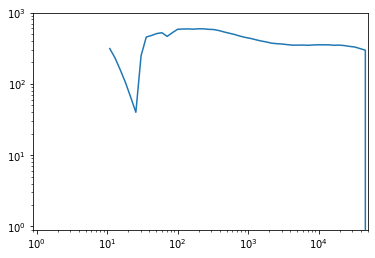

In [5]:
from scipy.integrate import quad
import math
from sympy import symbols, Eq, solve, sqrt
import numpy as np
from scipy.interpolate import CubicSpline
from matplotlib import pyplot as plt


### This script calculates Sensitivity as it is explained in Martinez-Castellanos ApJ 2022, AMEGO PAPER

##AMEGO SENSITIVITY POINTS

f_AMEO = open('./AMEGO_Sens_points.dat', 'r')
lines=f_AMEO.readlines()

SensAmeo=[]
SensAmeo_energy=[]


for x in lines:
    SensAmeo.append(float(x.split(' ')[1]))
    SensAmeo_energy.append(float(x.split(' ')[0])*1e3)
f_AMEO.close()


##GBM SENSITIVITY POINTS

f_GBM = open('./GBM_Sens.dat', 'r')
lines=f_GBM.readlines()

SensGBM=[]
SensGBM_energy=[]


for x in lines:
    SensGBM.append(float(x.split(' ')[1]))
    SensGBM_energy.append(float(x.split(' ')[0]))
f_GBM.close()


##BATSE SENSITIVITY POINTS

f_BATSE = open('./BATSE_Sens.dat', 'r')
lines=f_BATSE.readlines()

SensBATSE=[]
SensBATSE_energy=[]


for x in lines:
    SensBATSE.append(float(x.split(' ')[1]))
    SensBATSE_energy.append(float(x.split(' ')[0]))
f_BATSE.close()


##SWIFT SENSITIVITY POINTS

f_SWIFT = open('./SWIFT_Sens.dat', 'r')
lines=f_SWIFT.readlines()

SensSWIFT=[]
SensSWIFT_energy=[]


for x in lines:
    SensSWIFT.append(float(x.split(' ')[1]))
    SensSWIFT_energy.append(float(x.split(' ')[0]))
f_SWIFT.close()
##EFFECTIVE AREA

f = open('../EffArea.dat', 'r')
lines=f.readlines()
effA=[]
effA_energy=[]

Emin_sub = 100
Emax_sub = 1000

effA_sub=[]
effA_energy_sub=[]

for x in lines:
    effA.append(float(x.split(' ')[3]))
    effA_energy.append(float(x.split(' ')[0]))
    if(Emin_sub<float(x.split(' ')[0])<Emax_sub):
        effA_sub.append(float(x.split(' ')[3]))
        effA_energy_sub.append(float(x.split(' ')[0]))
f.close()

#Get interpolation funtion for Effective area points 

Aeff_interp = CubicSpline(effA_energy, effA, bc_type='natural')


plt.yscale('log')
plt.xscale('log')
plt.ylim(0, 1e3)
plt.xlim(0, 5e4)

#plt.scatter(effA_energy,effA)
plt.plot(effA_energy,Aeff_interp(effA_energy))



##IMPORT BACKGROUNDS
A_factor_upper=(2*np.pi*14.5**2)*(2*np.pi)
A_factor_lower=(np.pi*14.5**2)*(2*np.pi)

## Albedo
f_back_albedo = open('../bkg_reweight/AlbedoGamma.dat', 'r')
lines_back_albedo=f_back_albedo.readlines()
back_albedo_flux=[]
back_albedo_energy=[]
deltaE_albedo=[]

for x in lines_back_albedo:
    deltaE_albedo.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #print float(x.split(' ')[4]),' ',(float(x.split(' ')[3])-float(x.split(' ')[2]))
#    back_albedo_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_albedo_flux.append(float(x.split(' ')[3])*A_factor_lower)
    back_albedo_energy.append(float(x.split(' ')[0]))
#    back_albedo_energy_high.append(float(x.split(' ')[3]))
#    back_albedo_energy_low.append(float(x.split(' ')[2]))

f_back_albedo.close()

#print back_albedo_flux

## Cosmic gamma
f_back_cosmic = open('../bkg_reweight/DiffuseGamma.dat', 'r')
lines_back_cosmic=f_back_cosmic.readlines()
back_cosmic_flux=[]
back_cosmic_energy=[]
deltaE_cosmic=[]

for x in lines_back_cosmic:
    deltaE_cosmic.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #back_cosmic_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_cosmic_flux.append(float(x.split(' ')[3])*A_factor_upper)
    back_cosmic_energy.append(float(x.split(' ')[0]))
f_back_cosmic.close()

## Primary protons
f_back_protons = open('../bkg_reweight/PrimaryProton.dat', 'r')
lines_back_protons=f_back_protons.readlines()
back_protons_flux=[]
back_protons_energy=[]
deltaE_protons=[]

for x in lines_back_protons:
    deltaE_protons.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #back_protons_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_protons_flux.append(float(x.split(' ')[3])*A_factor_upper)
    back_protons_energy.append(float(x.split(' ')[0]))
f_back_protons.close()

## Primary protons_sec
f_back_protons_sec = open('../bkg_reweight/SecondaryProton.dat', 'r')
lines_back_protons_sec=f_back_protons_sec.readlines()
back_protons_sec_flux=[]
back_protons_sec_energy=[]
deltaE_protons_sec=[]

for x in lines_back_protons_sec:
    deltaE_protons_sec.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #back_protons_sec_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_protons_sec_flux.append(float(x.split(' ')[3])*A_factor_lower)
    back_protons_sec_energy.append(float(x.split(' ')[0]))
f_back_protons_sec.close()

## Primary neutrons
f_back_neutrons = open('../bkg_reweight/Neutron.dat', 'r')
lines_back_neutrons=f_back_neutrons.readlines()
back_neutrons_flux=[]
back_neutrons_energy=[]
deltaE_neutrons=[]

for x in lines_back_neutrons:
    deltaE_neutrons.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #back_neutrons_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_neutrons_flux.append(float(x.split(' ')[3])*A_factor_lower)
    back_neutrons_energy.append(float(x.split(' ')[0]))
f_back_neutrons.close()


## Add up all backgrounds in each energy bin, note that these come in ph keV-1 s-1

back_total_flux=[]
back_total_energy=[]

back_total_energy_sub=[]
back_total_flux_sub=[]

for i in range(np.size(back_cosmic_energy)) :
    back_total_flux.append(back_cosmic_flux[i]+back_albedo_flux[i]+back_protons_flux[i]+back_protons_sec_flux[i]+back_neutrons_flux[i])
    back_total_energy.append(back_cosmic_energy[i])
    if(Emin_sub<back_cosmic_energy[i]<Emax_sub):
        back_total_flux_sub.append(back_cosmic_flux[i]+back_albedo_flux[i]+back_protons_flux[i]+back_protons_sec_flux[i]+back_neutrons_flux[i])
        back_total_energy_sub.append(back_cosmic_energy[i])

## Integrate over energy range to get the RATE

back_rate =np.trapz(back_total_flux_sub,x=back_total_energy_sub)
print("back rate:"," ",back_rate)



In [6]:
#x = symbols('x')
#expr = x*effA_avg*Tobs - 6.5*(x*effA_avg*Tobs+back_rate*Tobs)

#eq1 = Eq(x*effA_avg*Tobs - 6.5*sqrt(x*effA_avg*Tobs+back_rate*Tobs),0)
eq1 = Eq(x*effA_avg*Tobs/(sqrt(x*effA_avg*Tobs+back_rate*Tobs)),6.5)


#print(0.4595*effA_avg*Tobs - 6.5*math.sqrt(0.4595*effA_avg*Tobs+back_rate*Tobs))

NameError: name 'effA_avg' is not defined

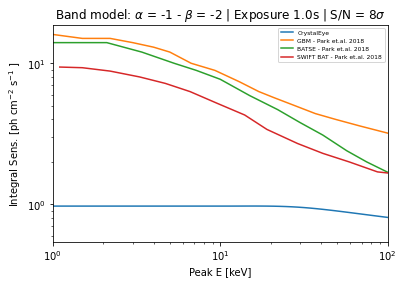

<Figure size 1200x800 with 0 Axes>

In [7]:
##NOW LET'S DEFINE THE SENSITIVITY VS. PEAK ENERGY FUNCTION

def Sens(Epeak):

    #Define parameters
    Tobs=1
    #First get signal events from S/N eq.
    x = symbols('x')
    eq1 = Eq(x/(sqrt(x+back_rate*Tobs)),8)
    sol = solve(eq1)
    Signal_Events = sol[0]
    #print("Number of signal events: ", Signal_Events)
    
    ##Defined COMPTOMNIZED MODEL FOR GRB prefered over Band model

    #A = 1.48e-2 # s-1 cm-2 between 10-1000 keV, not included in the spectral model!
    #alpha = -0.37
    #Epeak = 636
    
    #Parameters for BAND MODEL
    alpha = -1
    beta  = -2
    #double Epeak = 230;//keV
    threshold = (alpha-beta)*Epeak/(alpha+2);

    def GRB(x):
         #return (x/100)**(alpha)*np.exp(-(alpha+2)*x/Epeak) #Comptonized model
        
         if( x<threshold ):
             return (( x/100.)**(alpha) * np.exp( -(alpha+2)*x/Epeak ))
         elif( x>=threshold ):
             return (( x/100.)**(beta) * np.exp(beta-alpha) * ((alpha-beta)*Epeak/(100*(alpha+2)))**(alpha-beta))
        
        
    #Build function with GRB convolved with A_eff and Tobs

    def fat(x):
        return GRB(x)*Aeff_interp(x)*Tobs


    #Now let's solve integral eq. First calculate integral between 10 keV and 10 MeV

    fat_int = quad(fat, 10, 1000)
    fat_int = fat_int[0]
    #print("Integral of FAT: ",fat_int)
    
    

    eq3 = Eq(x*fat_int,Signal_Events)
    sol3 = solve(eq3)
    Norm_factor = sol3[0]
    
    #print("Norm. Factor is: ",Norm_factor)
    
    
    #Now Integrate GRB function with normalization factor to get the flux value
    A = sol3[0] # s-1 cm-2 between 10-1000 keV
    
    #COMPTONIZED
    #alpha = -0.37
    #Epeak = 636

    
    #Parameters for BAND MODEL
    #alpha = -0.67
    #beta  = -2.5
    #double Epeak = 230;//keV
    threshold = (alpha-beta)*Epeak/(alpha+2);
    def GRB_norm(x):
         #return A*(x/100)**(alpha)*np.exp(-(alpha+2)*x/Epeak) #Comptonized model
         
         if( x<threshold ):
             return (A*( x/100.)**(alpha) * np.exp( -(alpha+2)*x/Epeak ))
         elif( x>=threshold ):
             return (A*( x/100.)**(beta) * np.exp(beta-alpha) * ((alpha-beta)*Epeak/(100*(alpha+2)))**(alpha-beta))

    GRB_int = quad(GRB_norm, 10, 1000)
    GRB_int = GRB_int[0]
    #print("Mimimum flux: ",GRB_int)
    return(GRB_int)

#Apeak_array = np.linspace(10,1000,100)

#
Sens_BAND_1s=open('CrystalEye_SensBand_10keV_10MeV_1s.dat', 'w')

print()
Apeak_array = np.logspace(np.log10(1), np.log10(5000), 101,endpoint=False)
Sens_array=[]
for i in range(len(Apeak_array)):
    #print(Apeak_array[i])
    Sens_array.append(Sens(Apeak_array[i]))
    print(Apeak_array[i]," ",Sens(Apeak_array[i]),file=Sens_BAND_1s)

Sens_BAND_1s.close()
plt.title(r'Band model: $\alpha$ = -1 - $\beta$ = -2 | Exposure 1.0s | S/N = 8$\sigma$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Peak E [keV]')
plt.ylabel(r'Integral Sens. [ph cm$^{-2}$ s$^{-1}$ ]')    
plt.plot(Apeak_array,Sens_array, label='CrystalEye')
#plt.plot(SensAmeo_energy,SensAmeo, label='AMEGO')
plt.plot(SensGBM_energy,SensGBM, label='GBM - Park et.al. 2018')
plt.plot(SensBATSE_energy,SensBATSE, label='BATSE - Park et.al. 2018')
plt.plot(SensSWIFT_energy,SensSWIFT, label='SWIFT BAT - Park et.al. 2018')


plt.xlim([1,1e2 ])
#plt.ylim([3e-14,8e-9 ])
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
#plt.axvline(636, color = 'b',linestyle='dashdot',alpha=0.3,label='E$_{peak}$ fiducial model')
plt.legend(loc='upper right', prop={'size': 6})
plt.show()
plt.savefig('SensVSpeakE.png')

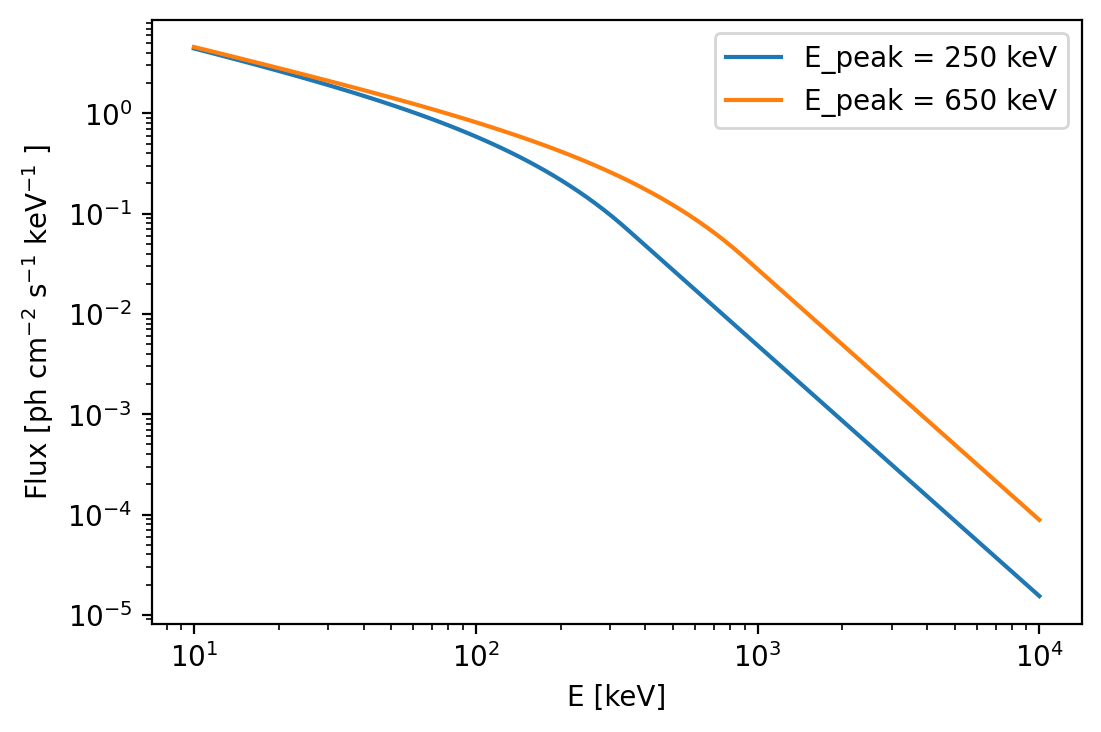

In [76]:
#PLOT the BAND model

#Parameters for Band model
alpha = -0.67
beta  = -2.5
#Epeak = 230 #keV
#threshold = (alpha-beta)*Epeak/(alpha+2);

def GRB(x,Epeak):
     #return (x/100)**(alpha)*np.exp(-(alpha+2)*x/Epeak) #Comptonized model
     threshold = (alpha-beta)*Epeak/(alpha+2);

     if( x<threshold ):
         return (( x/100.)**(alpha) * np.exp( -(alpha+2)*x/Epeak ))
     elif( x>=threshold ):
         return (( x/100.)**(beta) * np.exp(beta-alpha) * ((alpha-beta)*Epeak/(100*(alpha+2)))**(alpha-beta))
v_GRB=np.vectorize(GRB)
  
energy_band=np.logspace(1,4,100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('E [keV]')
plt.ylabel(r'Flux [ph cm$^{-2}$ s$^{-1}$ keV$^{-1}$ ]')
plt.plot(energy_band,v_GRB(energy_band,250), label='E_peak = 250 keV')
plt.plot(energy_band,v_GRB(energy_band,650), label='E_peak = 650 keV')
plt.legend()
plt.show()